# Student Details
* Guy Kabiri

# TL;DR
In this lab we have learned how to implement some image augmentations using `numpy` and `python`'s arrays.  
We have learned how to flip an image both horizontal and vertical.  
Also we have implemented an image rotating using `numpy` `meshgrid`, and image croping and zooming using `numpy`'s arrays.

# Imports

In [1]:
import random
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.signal import  convolve2d

%matplotlib inline 

In [2]:
!wget http://www.turtleluck.com/wp-content/uploads/2014/06/Lionel-Messi.jpg -O messi.jpg
!wget https://media.pri.org/s3fs-public/styles/open_graph/public/photos/2014-July/india_new_delhi_monkeys.jpg?itok=u1PJ8xjL -O monkey.jpg

--2021-03-20 13:39:54--  http://www.turtleluck.com/wp-content/uploads/2014/06/Lionel-Messi.jpg
Resolving www.turtleluck.com (www.turtleluck.com)... 209.124.66.9
Connecting to www.turtleluck.com (www.turtleluck.com)|209.124.66.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37353 (36K) [image/jpeg]
Saving to: ‘messi.jpg’

messi.jpg           100%[===================>]  36.48K  78.9KB/s    in 0.5s    

2021-03-20 13:39:55 (78.9 KB/s) - ‘messi.jpg’ saved [37353/37353]

--2021-03-20 13:39:55--  https://media.pri.org/s3fs-public/styles/open_graph/public/photos/2014-July/india_new_delhi_monkeys.jpg?itok=u1PJ8xjL
Resolving media.pri.org (media.pri.org)... 13.225.93.53, 13.225.93.82, 13.225.93.68, ...
Connecting to media.pri.org (media.pri.org)|13.225.93.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 426010 (416K) [image/jpeg]
Saving to: ‘monkey.jpg’

monkey.jpg          100%[===================>] 416.03K  --.-KB/s    in 0.05s   

2021-0

In [3]:
img = cv2.imread('monkey.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Lab

## Rotation

### Inefficient Rotation

In [4]:
def calc_angle(y_center, x_center, y, x):
    y_ang = y - y_center
    x_ang = x - x_center
    return np.arctan2(y_ang, x_ang)

def calc_center(img):
    y = img.shape[0] // 2
    x = img.shape[1] // 2
    return y, x

def calc_distance(y_center, x_center, y, x):
    return np.sqrt(np.square(y_center - y) + np.square(x_center - x))

def rotate_image(img: np.ndarray, angle: float) -> np.ndarray:
    y_center, x_center = calc_center(img)

    rotated_img = np.zeros(img.shape)

    for idx_row in range(img.shape[0]):
        for idx_col in range(img.shape[1]):
            ang = calc_angle(y_center, x_center, idx_row, idx_col) - np.radians(angle)
            distance = calc_distance(y_center, x_center, idx_row, idx_col)

            new_y = int(np.round(np.sin(ang) * distance)) + y_center
            new_x = int(np.round(np.cos(ang) * distance)) + x_center

            if new_y <0 or new_y >= img.shape[0] or new_x <0 or new_x >=img.shape[1]:
                continue
            rotated_img[idx_row, idx_col] = img[new_y, new_x]

    return rotated_img

### Efficient Rotation

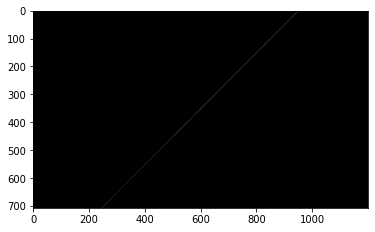

In [5]:
def rotate(img, theta):
    angle = np.deg2rad(theta)

    h, w = img.shape

    middle_y = h // 2
    middle_x = w // 2

    y = np.linspace(0, h, h, endpoint=False).astype(int)
    x = np.linspace(0, w, w, endpoint=False).astype(int)
    xx, yy = np.meshgrid(x, y)

    rot_x = ((xx - middle_x) * np.cos(angle) - (yy - middle_y) * np.sin(angle) + middle_x).astype(int)
    rot_y = ((yy - middle_y) * np.cos(angle) - (xx - middle_x) * np.sin(angle) + middle_y).astype(int)

    mask = rot_x[yy, xx] > 0
    mask &= rot_x[yy, xx] < w

    mask &= rot_y[yy, xx] > 0
    mask &= rot_y[yy, xx] < h

    output = np.zeros(img.shape)

    for r_idx in range(h):
        for c_idx in range(w):
            if rot_x[r_idx, c_idx] >= 0 and rot_x[r_idx, c_idx] < w and rot_y[r_idx, c_idx] >= 0 and rot_y[r_idx, c_idx] < h:
                output[rot_y[r_idx, c_idx], rot_x[r_idx, c_idx]] = img[r_idx, c_idx]

    # output[~mask] = 60

    # output = convolve2d(img, rot_mat)


    # x = np.linspace(0, img.shape[1], 1)
    # y = np.linspace(0, img.shape[0], 1)

    # xx, yy = np.meshgrid(x, y)

    # output = 

    return output


plt.imshow(rotate(img, 45), 'gray')

### Compare Rotation Time

In [32]:
t1 = %time output = rotate(img, 60)

CPU times: user 1.74 s, sys: 24 ms, total: 1.76 s
Wall time: 1.79 s


In [33]:
t2 = %time output_inefficient = rotate_image(img, 60)

CPU times: user 19 s, sys: 955 µs, total: 19 s
Wall time: 19 s


Reduced factor is about 10. 💪🏼🥳

(707, 1200) (707, 1200)


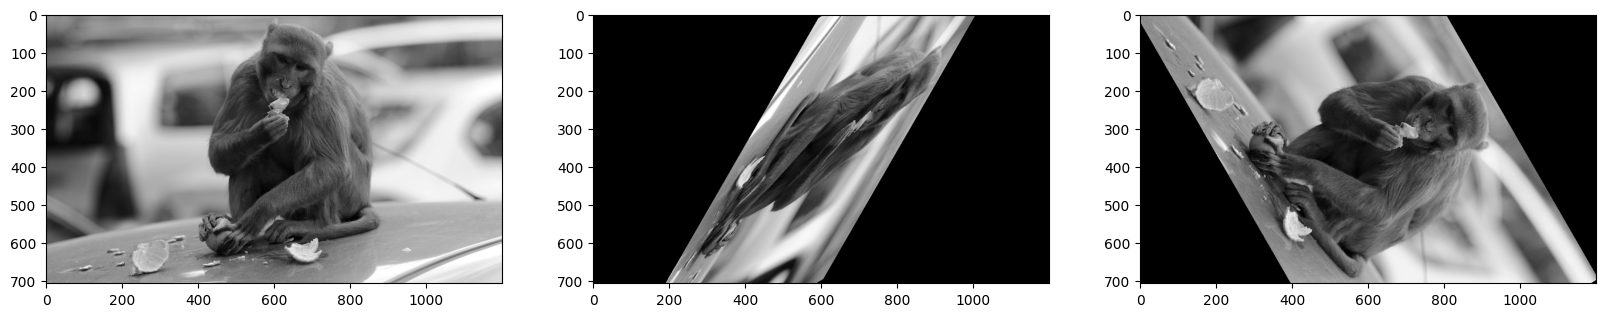

In [8]:
print(output.shape, img.shape)

plt.figure(figsize=(20, 10), dpi=100)

plt.subplot(131)
plt.imshow(img,'gray')
plt.subplot(132)
plt.imshow(output,'gray')
plt.subplot(133)
plt.imshow(output_inefficient,'gray')

## Flip

### Vertical Flip 

In [9]:
img_color = cv2.imread('monkey.jpg')
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

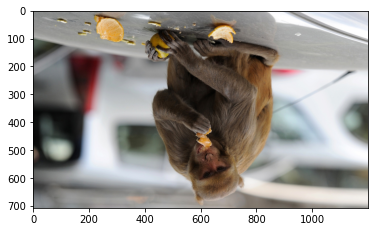

In [10]:
def vertical_flip(img):
    if len(img.shape) > 2:
        return img.copy()[::-1, :, :]
    return img.copy()[::-1, :]

vertical_flipped =  vertical_flip(img_color)
plt.imshow (vertical_flipped)

### Horizontal Flip 

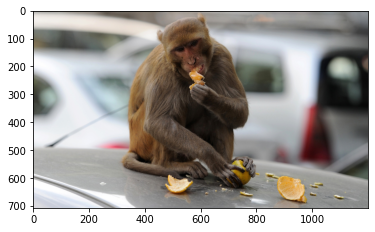

In [11]:
def horizontal_flip(img):
    if len(img.shape) > 2:
        return img.copy()[:, ::-1, :]
    return img.copy()[:, ::-1]

horziontal_flipped = horizontal_flip(img_color)
plt.imshow(horziontal_flipped)

## Gaussian Blur 

In [12]:
def get_gaussian_filter(kernel_size, sigma, sig_range=1):
    spaced_range = np.linspace(start=-sig_range, stop=sig_range, num=kernel_size)
    xx, yy = np.meshgrid(spaced_range, spaced_range)
    g = (1 / (2 * np.pi * (sigma ** 2)))
    g *= np.exp(-(xx ** 2 + yy ** 2) / (2 * (sigma ** 2)))
    return g / g.sum()

In [13]:
def gaussian_blur(img, kernel_size, sigma, sig_range=1):
    gaussian_kernel = get_gaussian_filter(kernel_size=19, sigma=0.3)
    return convolve2d(img.copy(), gaussian_kernel, mode='same')

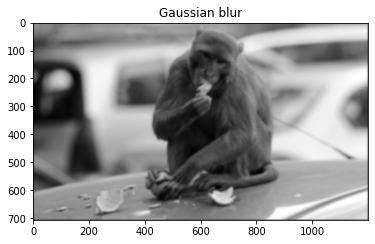

In [14]:
blurred_img_medium_sigma = gaussian_blur(img, kernel_size=19, sigma=0.3)
plt.imshow(blurred_img_medium_sigma, cmap='gray')
plt.title('Gaussian blur')
plt.show()

## Median Blur

In [15]:
def median_single_channel(img, kernel_size):
    (h, w) = img.shape
    w_k, h_k = kernel_size, kernel_size

    padd_h = calc_padding(h, h, kernel_size)
    padd_w = calc_padding(w, w, kernel_size)

    res = np.zeros_like(img)
    img_padded = np.pad(img, [padd_h, padd_w])

    for r in range(res.shape[0]):
        for c in range(res.shape[1]):
            res[r, c] = np.median(img_padded[r:r + w_k, c:c + w_k])

    return res

def calc_padding(dim_out, dim_in, kernel_size):
  return int(np.ceil((dim_out - dim_in + kernel_size) / 2) - 1)

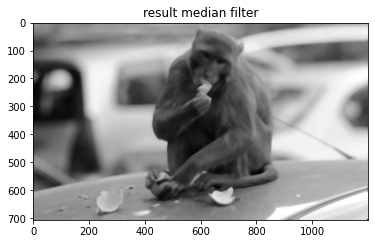

In [16]:
medianed_img = median_single_channel(img, 11)
plt.imshow(medianed_img, 'gray')
plt.title('result median filter')
plt.show()

## ZOOM
if the zoom value is larger then 1 zoom out,  
if zoom value is smaller then 1 zoom in.

### Zoom using `cv2.resize`

In [17]:
def zoom_img(img, zoom_x=1, zoom_y=1):
    real_h, real_w = img.shape[:2]
    
    height = int(img.shape[0] / zoom_y)
    width = int(img.shape[1] / zoom_x)
    dim = (width, height)
    
    # resize image, dimentions will change
    resized = cv2.resize(img, dim, fx=zoom_x, fy=zoom_y,  interpolation=cv2.INTER_AREA)

    output = np.zeros(img.shape)

    # calculate the position to place the image in the output array
    start_y = np.abs(height - real_h) // 2
    start_x = np.abs(width - real_w) // 2
    end_y = start_y + real_h
    end_x = start_x + real_w

    #   if zoom-in -> re-position the image to the center
    if width > real_w:
        output = resized[start_y: end_y, start_x: end_x]
        
    #   else zoom-out -> padding the output array with black background 
    else:   
        output = np.pad(array=resized, pad_width=((start_y, start_y), (start_x, start_x)), mode='constant', constant_values=0)

    return output

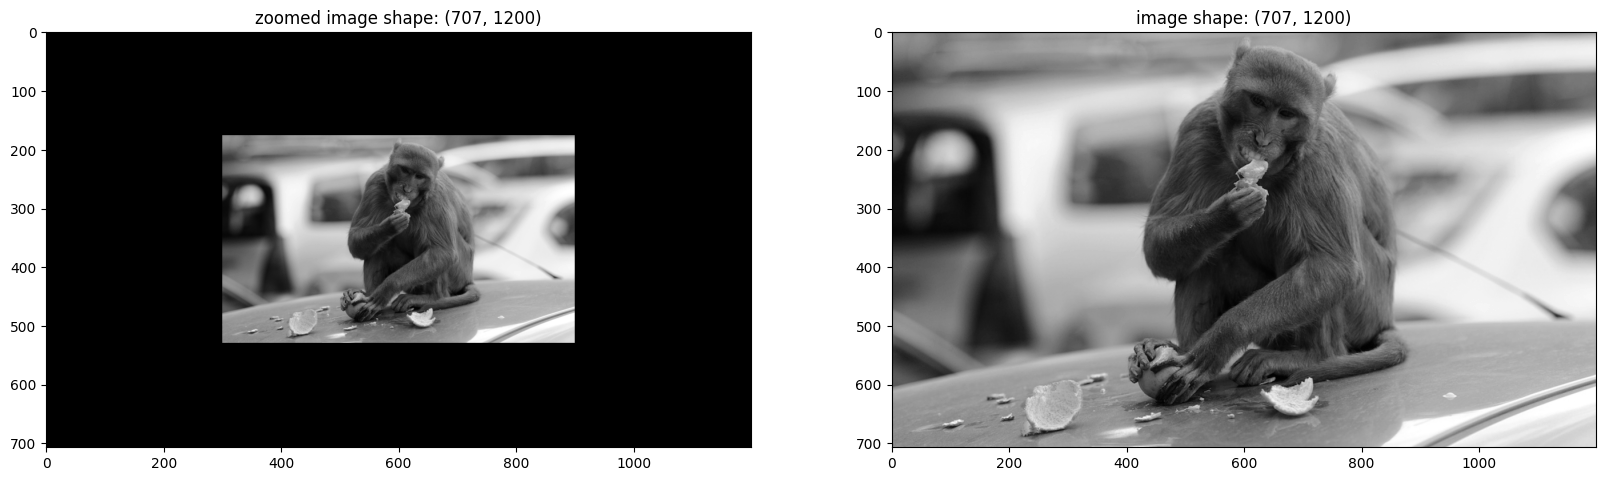

In [18]:
plt.figure(figsize=(20, 10), dpi=100)

# zoomed_image = zoom_img(img, 0.5, 0.5)
zoomed_image = zoom_img(img, 2, 2)

plt.subplot(1, 2, 1)
plt.imshow(zoomed_image, cmap='gray')
plt.title('zoomed image shape: ' + str(zoomed_image.shape))

plt.subplot(1, 2, 2)
plt.imshow(img, 'gray')
plt.title('image shape: ' + str(img.shape))

plt.show()

### Zoom without `cv2.resize`

In [19]:
def zoom_img2(img, zoom_x=1, zoom_y=1):

    output = np.zeros(img.shape)
    real_h, real_w = img.shape

    #   calculate the zoom factors
    zoom_x = int(np.ceil(zoom_x))
    zoom_y = int(np.ceil(zoom_y))

    #   calculate the windows size
    window_h_size = int((real_h - (real_h / zoom_y)))
    window_w_size = int((real_w - (real_w / zoom_y)))

    #   calculate the offset in each axis
    y_offset = int((real_h - (real_h / zoom_y)) / 2)
    x_offset = int((real_w - (real_w / zoom_x)) / 2)

    def zoom_in(img, zoom_x=1, zoom_y=1):

        r, c = 0, 0

        for idx_row in range(y_offset, y_offset + window_h_size):
            c = 0
            for idx_col in range(x_offset, x_offset + window_w_size):
                if idx_row >= real_h or idx_col >= real_w:
                    continue
                output[r: r + zoom_y, c: c + zoom_x] = img[idx_row, idx_col]
                c += zoom_x
            r += zoom_y

        return output

    def zoom_out(img, zoom_x=1, zoom_y=1):

        r, c = y_offset, x_offset

        for idx_row in range(0, real_h, zoom_y):
            c = x_offset
            for idx_col in range(0, real_w, zoom_x):
                if idx_row >= real_h or idx_col >= real_w:
                    continue
                output[r, c] = img[idx_row, idx_col]
                c += 1
            r += 1

        return output
        
    if zoom_x < 1 or zoom_y < 1:
        return zoom_in(img, 1 / zoom_x, 1 / zoom_y)
    elif zoom_x > 1 or zoom_y > 1:
        return zoom_out(img, zoom_x, zoom_y)
        
    return img  #   else -> zoom factor is 1

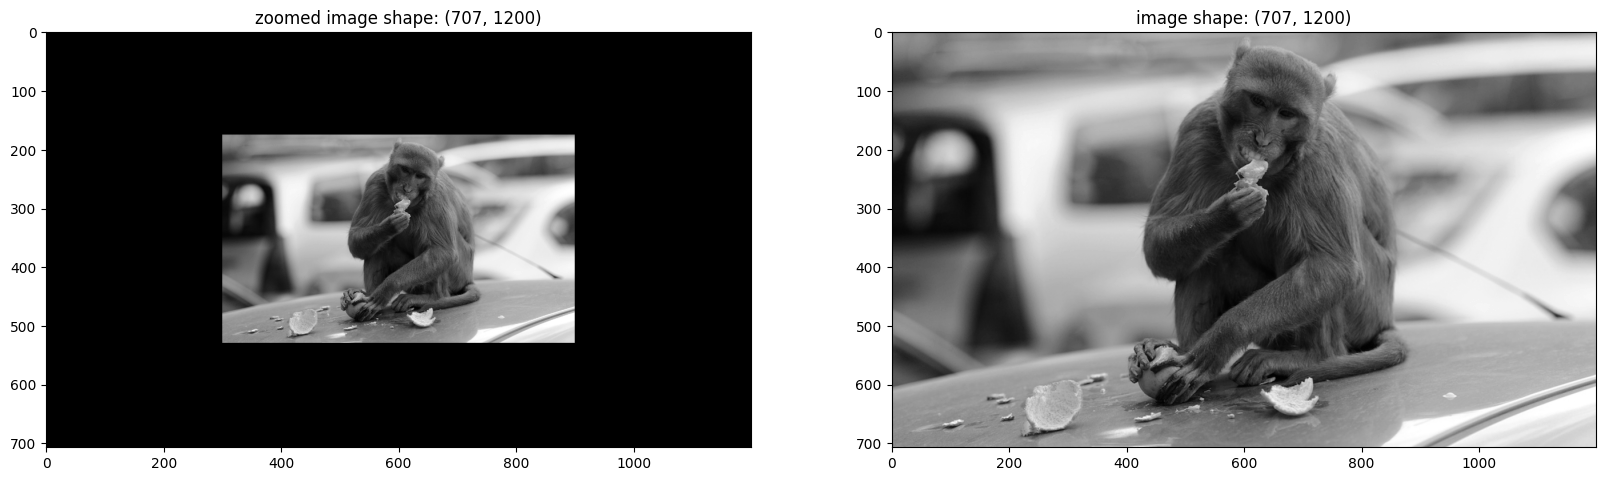

In [20]:
plt.figure(figsize=(20, 10), dpi=100)

# zoomed_image = zoom_img2(img, 0.5, 0.5)
zoomed_image = zoom_img2(img, 2, 2)
plt.subplot(1, 2, 1)
plt.imshow(zoomed_image, cmap='gray')
plt.title('zoomed image shape: ' + str(zoomed_image.shape))

plt.subplot(1, 2, 2)
plt.imshow(img, 'gray')
plt.title('image shape: ' + str(img.shape))

plt.show()

## Crop

In [21]:
def crop(img, x1, y1, x2, y2):

    #   if the two points have same axises -> can not crop the image
    if x1 == x2 or y1 == y2:
        return img

    #   determine whether the coordinates belong to top_left or bottom_right
    left_x = x1 if x1 < x2 else x2
    right_x = x1 + x2 - left_x

    top_y = y1 if y1 < y2 else y2
    bottom_y = y1 + y2 - top_y

    (h, w) = img.shape

    #   if one of the coordinate is out of bounds
    if not w > left_x > 0 or not w > right_x > 0:
        return img
    elif not h > top_y > 0 or not h > bottom_y > 0:
        return img

    cropped = img.copy()
    return cropped[top_y:bottom_y, left_x:right_x]

In [22]:
#       x1, y1, x2, y2 
bbox = [540, 20, 750, 250] 
x1, y1, x2, y2 = bbox
# cropped_img = img[y1:y2, x1:x2]
cropped_img = crop(img, x1, y1, x2, y2)

Text(0.5, 1.0, "Monkey's head: [540, 20, 750, 250]")

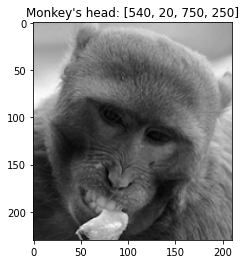

In [23]:
plt.imshow(cropped_img,'gray')
plt.title('Monkey\'s head: ' + str(bbox))

## Sharpening
Delta - Lower

In [24]:
alpha = 0.95

laplacian = np.array((
                    [0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]), dtype="int") 

delta = np.array(([0, 0, 0],
                  [0, 1, 0],
                  [0, 0, 0]))

laplacian_sharper = (laplacian * alpha) + delta

In [25]:
laplacian_sharper

array([[ 0.  , -0.95,  0.  ],
       [-0.95,  4.8 , -0.95],
       [ 0.  , -0.95,  0.  ]])

In [26]:
def sharpen(img, kernel):
    return np.abs(convolve2d(img.copy(), kernel))
    
sharpened_img = sharpen(img, laplacian_sharper)

Text(0.5, 1.0, ' normalized sharpened_img max value:1.0')

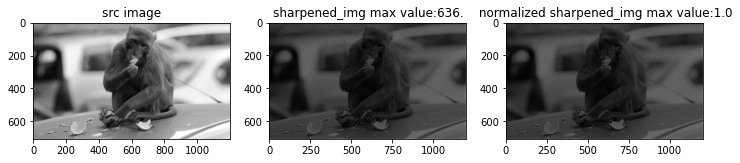

In [27]:
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('src image')
plt.subplot(1, 3, 2)
plt.imshow(sharpened_img, cmap="gray")
plt.title("sharpened_img max value:"+str(sharpened_img.max())[:4])
plt.subplot(1, 3, 3)
normalized_sharpened_img = sharpened_img / sharpened_img.max()
plt.imshow(normalized_sharpened_img, cmap="gray")
plt.title(" normalized sharpened_img max value:" +
          str(normalized_sharpened_img.max()))


# 10 Random Image Augmentations

In [28]:
messi_img = cv2.imread('messi.jpg')
messi_img = cv2.cvtColor(messi_img, cv2.COLOR_BGR2GRAY)

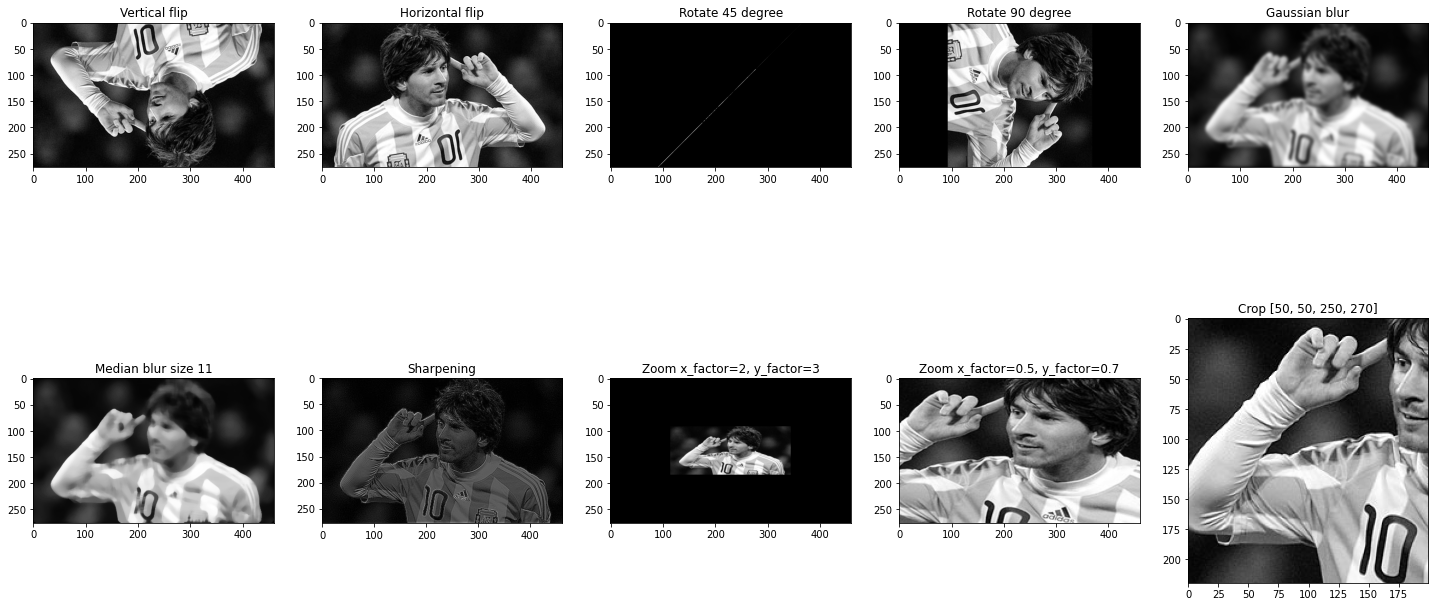

In [29]:
plt.figure(figsize=(25, 12))

plt.subplot(2,5,1)
plt.imshow(vertical_flip(messi_img), cmap='gray')
plt.title('Vertical flip')

plt.subplot(2,5,2)
plt.imshow(horizontal_flip(messi_img), cmap='gray')
plt.title('Horizontal flip')

plt.subplot(2,5,3)
plt.imshow(rotate(messi_img, 45), cmap='gray')
plt.title('Rotate 45 degree')

plt.subplot(2,5,4)
plt.imshow(rotate(messi_img, 90), cmap='gray')
plt.title('Rotate 90 degree')

plt.subplot(2,5,5)
plt.imshow(gaussian_blur(messi_img, kernel_size=19, sigma=0.3), cmap='gray')
plt.title('Gaussian blur')

plt.subplot(2,5,6)
plt.imshow(median_single_channel(messi_img, kernel_size=11), cmap='gray')
plt.title('Median blur size 11')

plt.subplot(2,5,7)
plt.imshow(sharpen(messi_img, laplacian_sharper), cmap='gray')
plt.title('Sharpening')

plt.subplot(2,5,8)
plt.imshow(zoom_img(messi_img, zoom_x=2, zoom_y=3), cmap='gray')
plt.title('Zoom x_factor=2, y_factor=3')

plt.subplot(2,5,9)
plt.imshow(zoom_img(messi_img, zoom_x=0.5, zoom_y=0.7), cmap='gray')
plt.title('Zoom x_factor=0.5, y_factor=0.7')

plt.subplot(2,5,10)
plt.imshow(crop(messi_img, 50, 50, 250, 270), cmap='gray')
plt.title('Crop [50, 50, 250, 270]')

plt.show()

In [30]:
# def randomize_img(path):
#     output_img = cv2.imread(path)
#     output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2GRAY)

#     if bool(random.getrandbits(1)) is True:
#         output_img = vertical_flip(output_img)
    
#     elif bool(random.getrandbits(1)) is True:
#         output_img = horizontal_flip(output_img)

#     if bool(random.getrandbits(1)) is True:
#         output_img = gaussian_blur(output_img, kernel_size=19, sigma=0.3)

#     elif bool(random.getrandbits(1)) is True:
#         output_img = median_single_channel(output_img, kernel_size=11)

#     #   zoom
#     if bool(random.getrandbits(1)) is True:
#          #   zoom-in
#         if bool(random.getrandbits(1)) is True:
#             zoom_factor = random.choice([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
#          #   zoom-out
#         else:
#             zoom_factor = random.randint(0, 5)
#         output_img = zoom_img(output_img, zoom_factor, zoom_factor)

#     #   crop
#     if bool(random.getrandbits(1)) is True:
#         x1 = random.randint(0, 50)
#         x2 = random.randint(100, output_img.shape[1])
#         y1 = random.randint(0, 50)
#         y2 = random.randint(100, output_img.shape[0])
#         output_img = crop(output_img, x1, y1, x2, y2)

#     #   sharpening
#     if bool(random.getrandbits(1)) is True:
#         output_img = sharpen(output_img, laplacian)

#     return output_img.copy()

In [31]:
# plt.figure(figsize=(12, 8))
# count = 1
# for r in range(2):
#     for c in range(5):
#         img = randomize_img('messi.jpg')
#         plt.subplot(r + 1 , c + 1, 1)
#         plt.imshow(img, cmap='gray')
#         plt.title('Image {}'.format(count))
#         count += 1